<a href="https://colab.research.google.com/github/Loris997/Learning_portfolio/blob/main/Learning_portfolio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learning Protfolio 4**

I downloaded a dataset with information about heart attacks. i tried to predict if a heart attack will happen or not with the help of neural networks.

First we need to import all needed libraries.

In [20]:
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

Load the data.

In [2]:
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/SE/heart.csv")

Mounted at /content/drive


Look at the data.

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Check if there are any null values.

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We can have a look at the correlations of the variables.

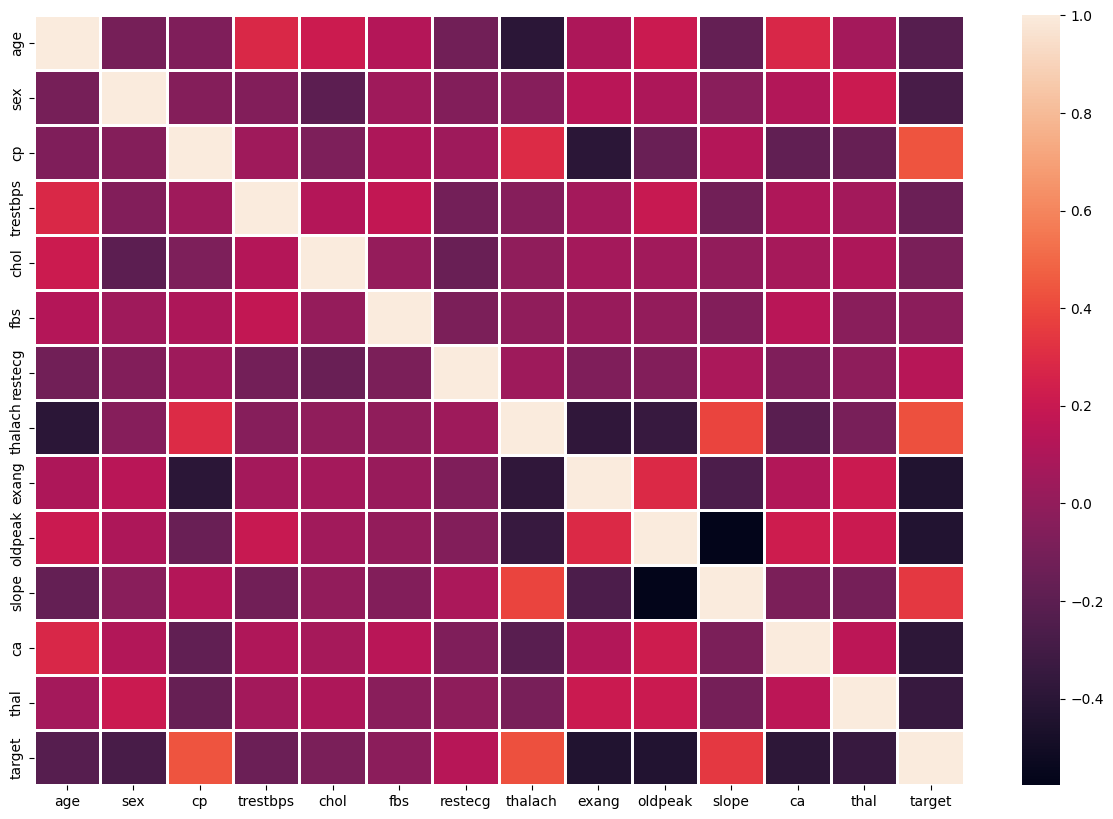

In [6]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=False,linewidths=1);

We separate our data into the target variable y and argument varables x.

In [12]:
y = data['target']
x = data.drop(['target'],axis=1)


Split the dataset into train and test.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)


In order for the model to work better we need to do a scaling process. We therefore use the StandardScaler and use it on x_train and x_test.

In [19]:
Scaler = StandardScaler()
Scaler.fit(x_train)
x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)


Now we use the scaled x_train and y_train set for the model. Afterward we test it with the x_test_scaled set and print the predictions out.

In [23]:
MLPC = MLPClassifier().fit(x_train_scaled,y_train)
y_prediction = MLPC.predict(x_test_scaled)
print(y_prediction[:10])

[0 1 1 0 1 1 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


We now print the real Y values and the predicted Y values. It allows to have a brief overview of how the model performs.

In [17]:
NewData = pd.DataFrame({'Real_Y_Values':y_test,
                       'Prediction_Y_Values':y_prediction})
NewData.head()

,Real_Y_Values,Prediction_Y_Values
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1


We then calculate the real accuracy which is at 0.835. This is not too bad, but could be better.

In [18]:
accuracy_score(y_test,y_prediction)

0.8351648351648352